In [1]:
import pandas as pd
import plotly.express as px

Getting the files to plot:

In [8]:
full_df = pd.read_json('../../data/final_data/doi_with_count_second_version.json', orient="index").convert_dtypes()
full_df['dois']=full_df['dois'].apply(lambda x: len(x))

In [36]:
open_cit_df = pd.read_json('../../data/final_data/open_cit_in_years.json')

General information about number of citations and references. 
The open_cited and open_citing numbers are the same, as expected, since our study is about citations inside the same dataset.

In [12]:
print(full_df[['cited', 'citing', 'open_cited', 'open_citing']].sum(axis=0))

cited           36048741
citing         112833189
open_cited      10590234
open_citing     10590234
dtype: int64


General plots for the 30 most citing, cited, open citing and open cited journals:

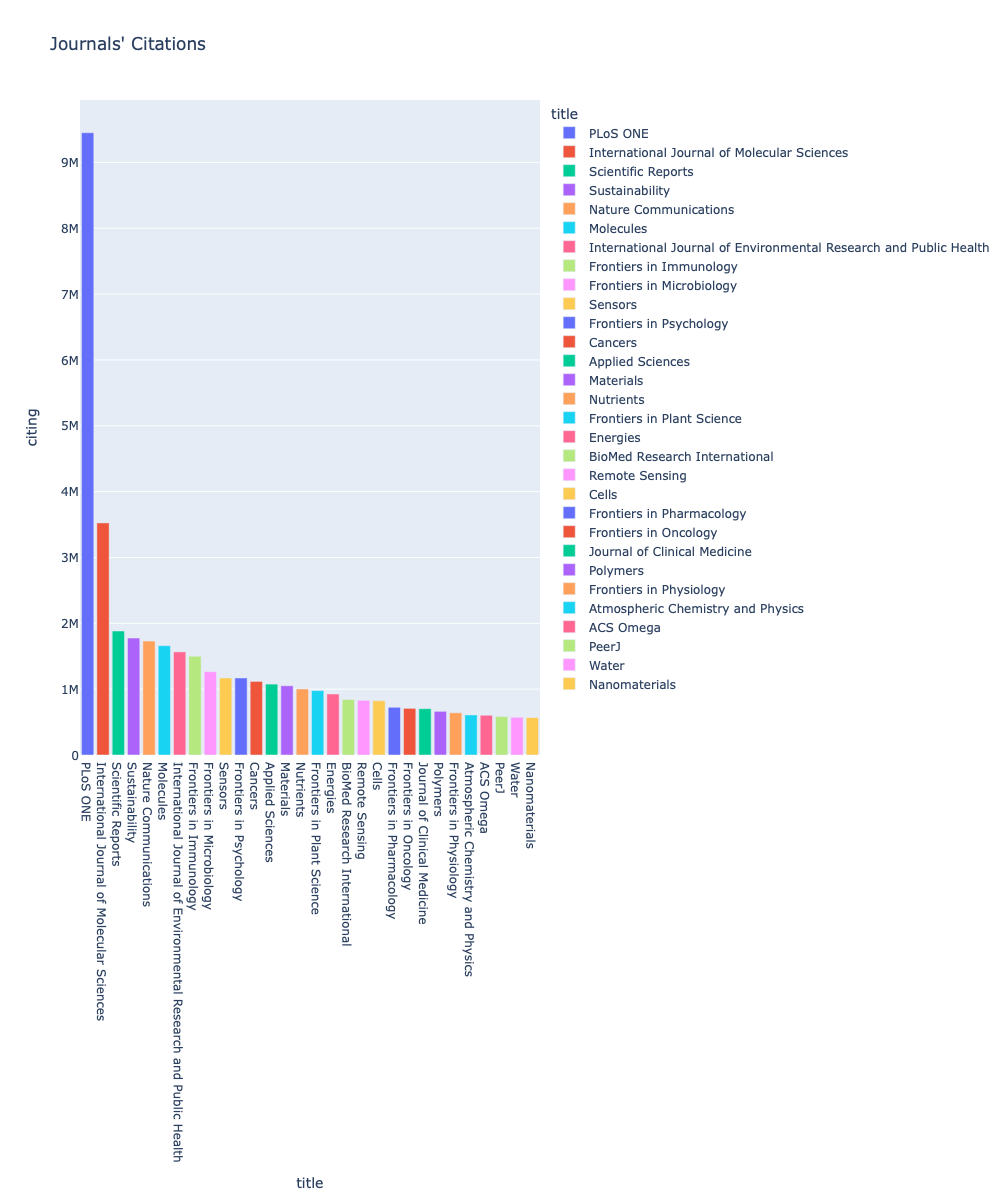

In [21]:
df_sorted_by_citing = full_df.sort_values('citing', ascending=False).reset_index()
plot_sorted_by_citing = px.bar(df_sorted_by_citing.iloc[:30,:], x='title', y='citing',
             hover_data=['citing'], color='title',
             title="Journals' Citations", height=1200, width=1200)
plot_sorted_by_citing.show()

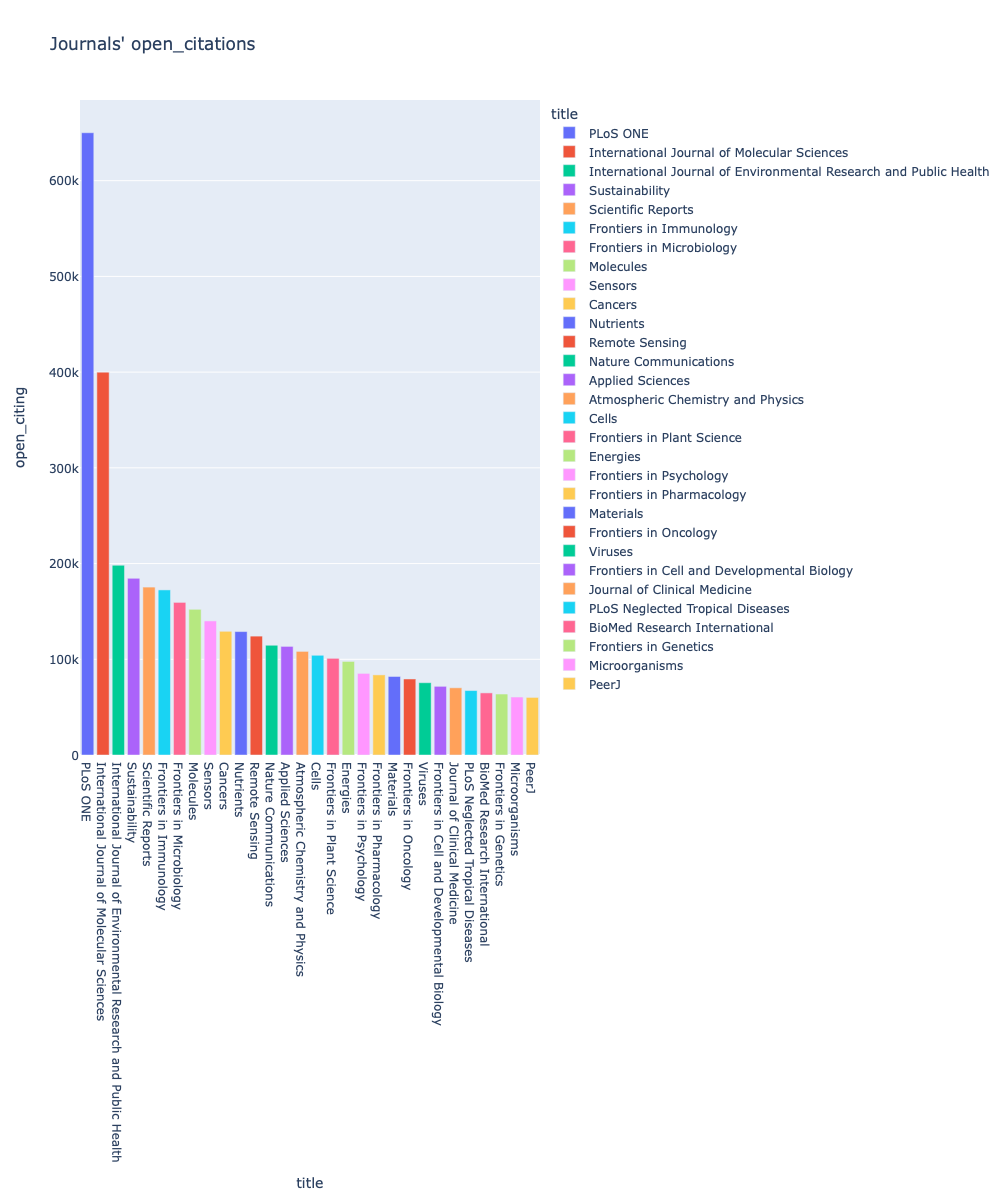

In [23]:
df_sorted_by_open_citing = full_df.sort_values('open_citing', ascending=False).reset_index()
plot_sorted_by_open_citing = px.bar(df_sorted_by_open_citing.iloc[:30,:], x='title', y='open_citing',
             hover_data=['open_citing'], color='title',
             title='Journals\' open_citations', height=1200, width=1200)
plot_sorted_by_open_citing.show()

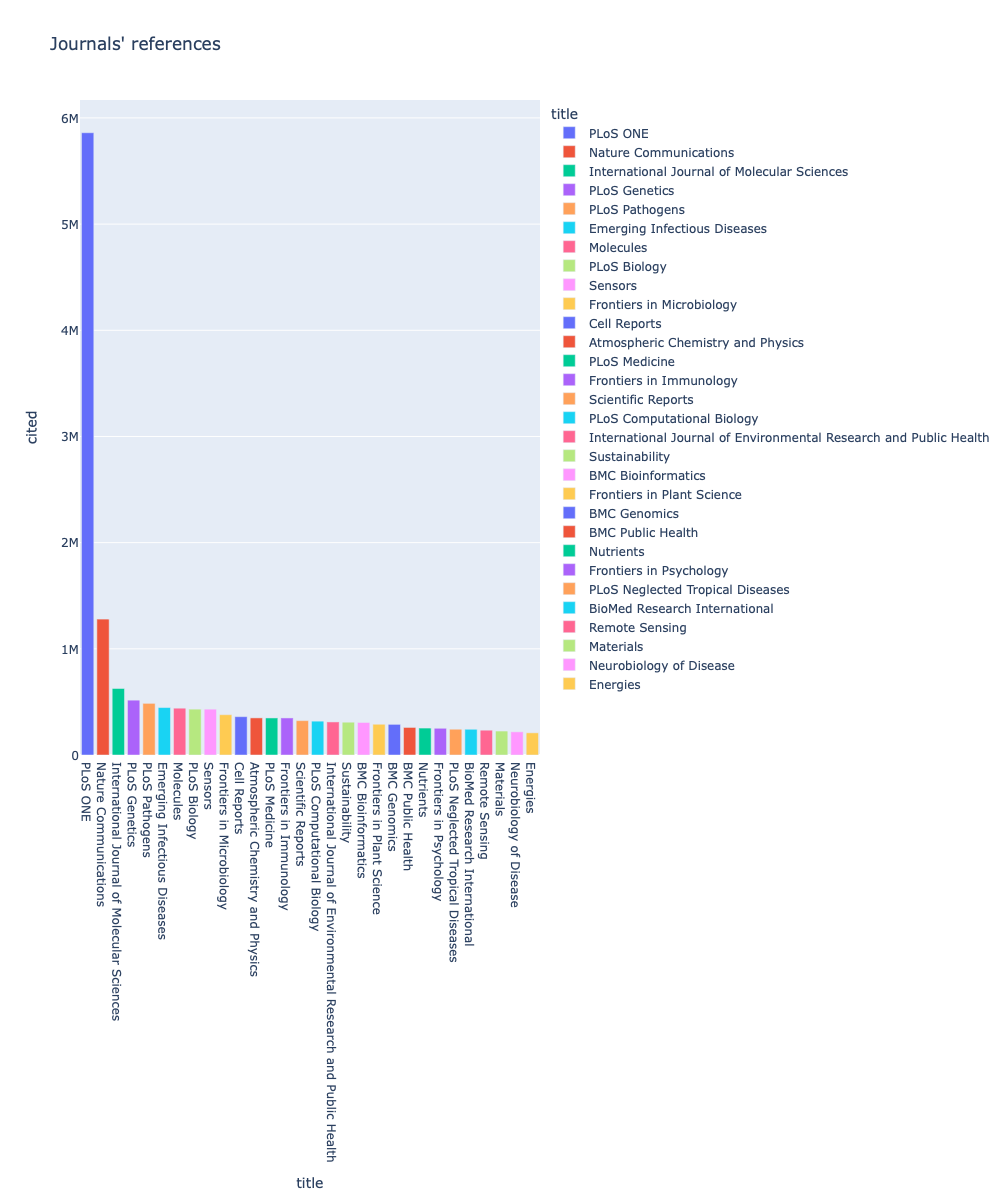

In [25]:
df_sorted_by_cited = full_df.sort_values('cited', ascending=False).reset_index()
plot_sorted_by_cited = px.bar(df_sorted_by_cited.iloc[:30,:], x='title', y='cited',
             hover_data=['cited'], color='title',
             title='Journals\' references', height=1200, width=1200)
plot_sorted_by_cited.show()

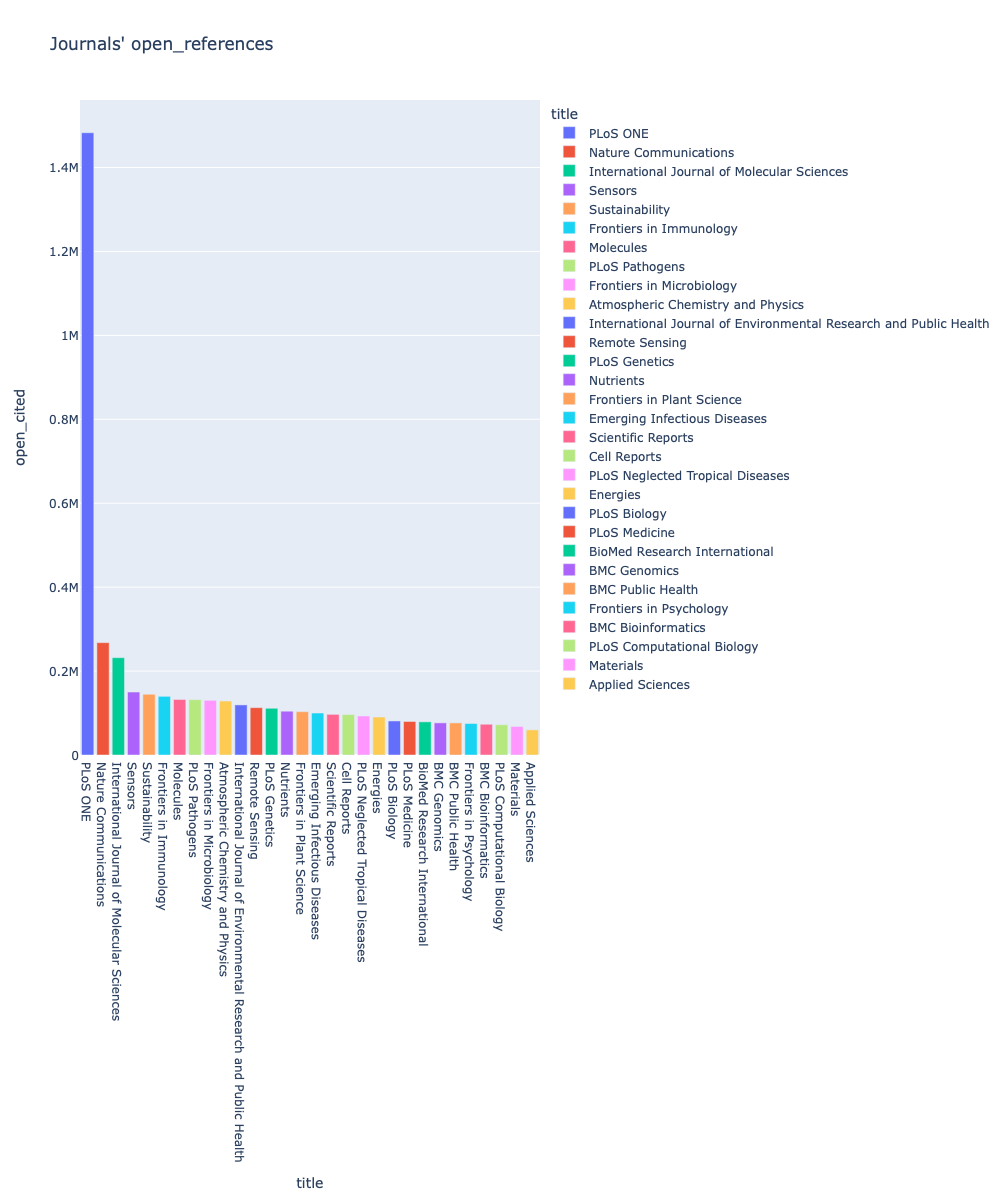

In [26]:
df_sorted_by_open_cited = full_df.sort_values('open_cited', ascending=False).reset_index()
plot_sorted_by_open_cited = px.bar(df_sorted_by_open_cited.iloc[:30,:], x='title', y='open_cited',
             hover_data=['open_cited'], color='title',
             title='Journals\' open_references', height=1200, width=1200)
plot_sorted_by_open_cited.show()

Same plots but with the addition of the information about the number of articles indexed:

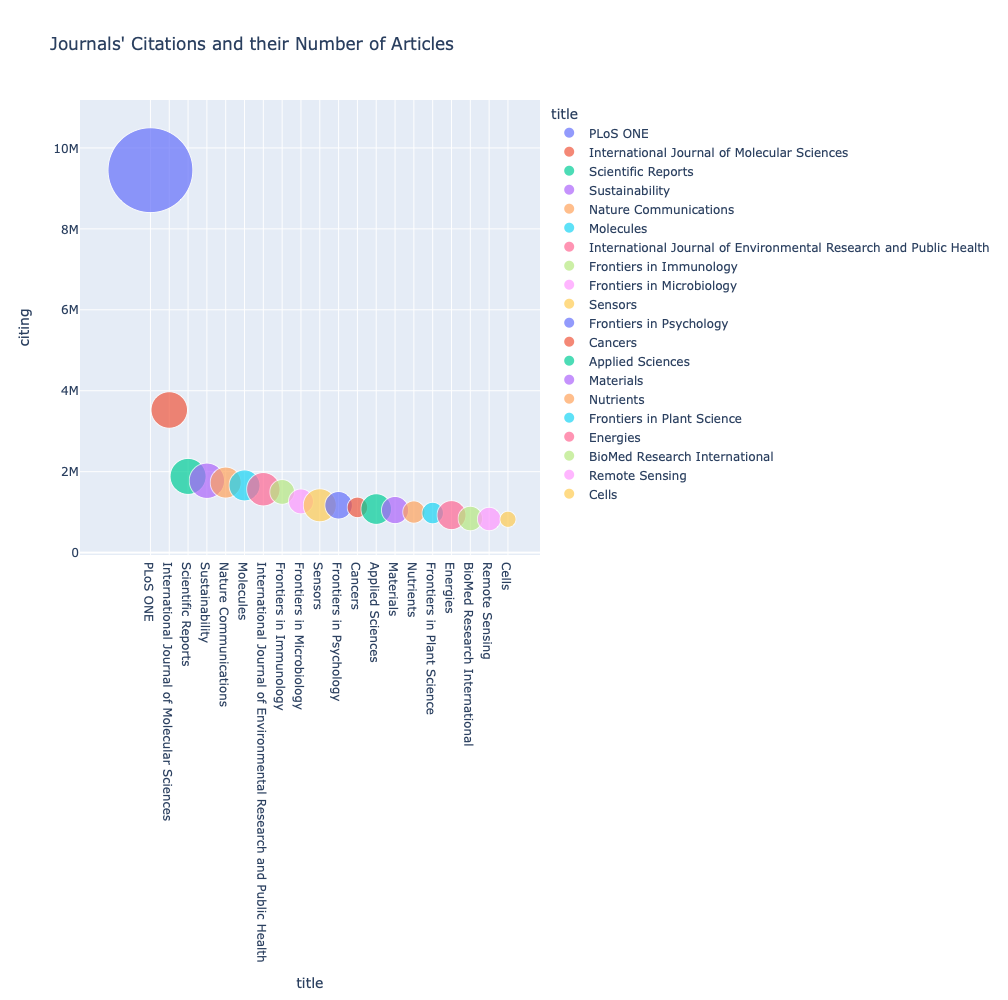

In [29]:
sorted_by_citing_with_num_dois = px.scatter(df_sorted_by_citing.iloc[:20,:], x="title", y="citing",
                                            size="dois", color="title",  title="Journals' Citations and their Number of Articles",
                                            hover_name="title", width=1200, height=1000, size_max=60)
sorted_by_citing_with_num_dois.show()

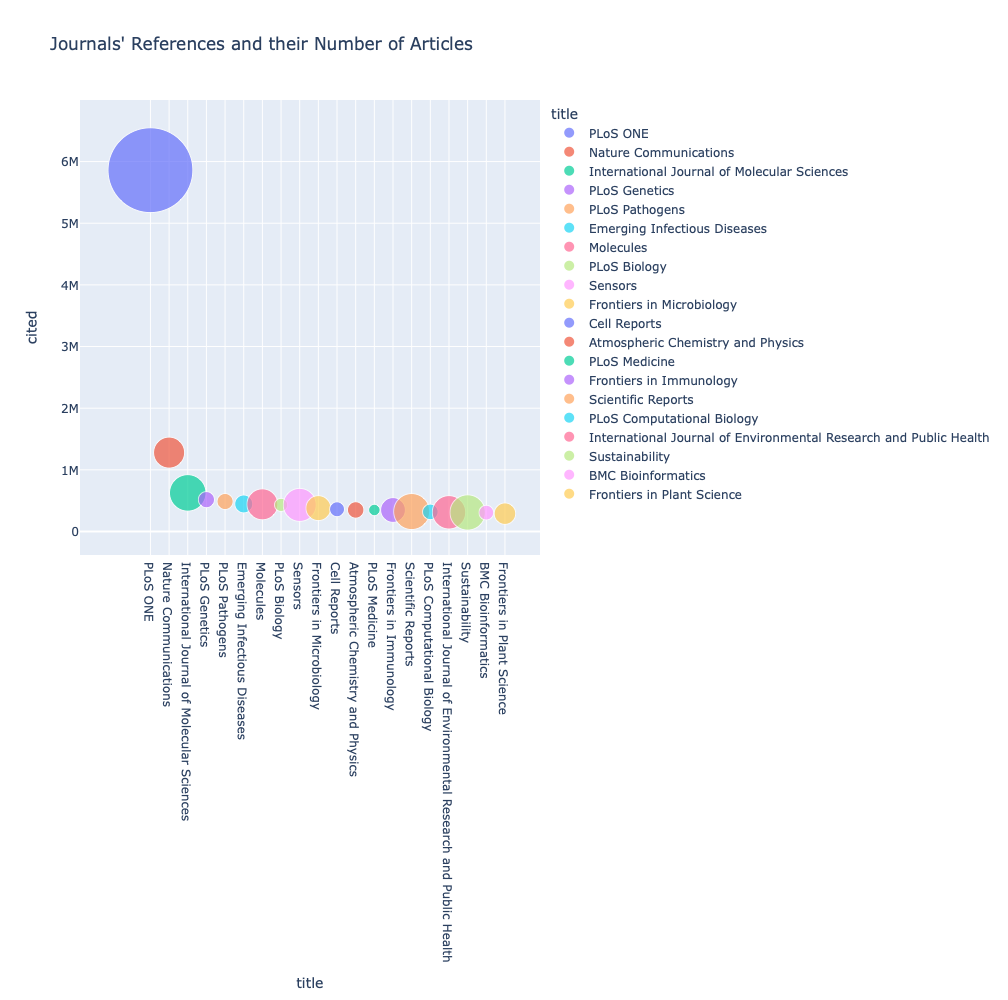

In [30]:
sorted_by_cited_with_num_dois = px.scatter(df_sorted_by_cited.iloc[:20,:], x="title", y="cited",
                                           size="dois", color="title", title="Journals' References and their Number of Articles",
                                           hover_name="title", width=1200, height=1000, size_max=60)
sorted_by_cited_with_num_dois.show()

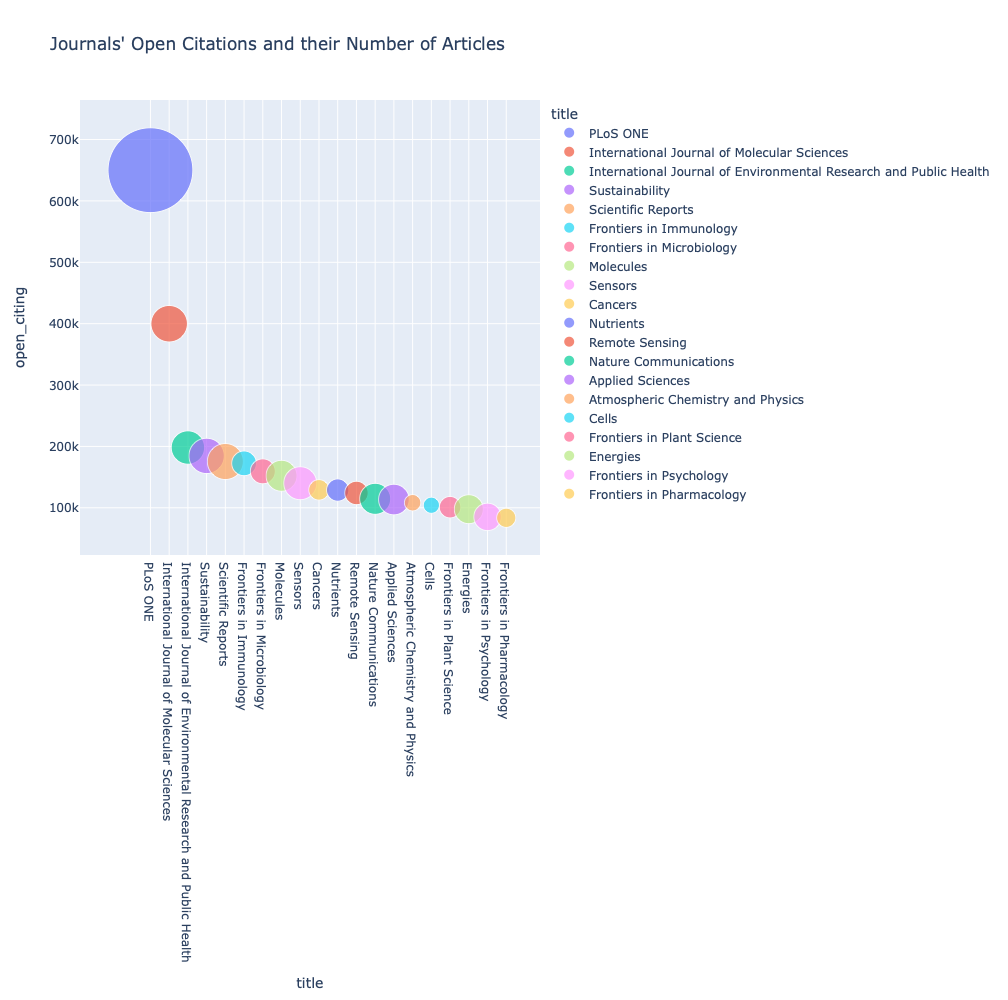

In [33]:
sorted_by_open_citing_with_num_dois = px.scatter(df_sorted_by_open_citing.iloc[:20,:], x="title", y="open_citing",
                                                 size="dois", color="title", title="Journals' Open Citations and their Number of Articles",
                                                 hover_name="title", width=1200, height=1000, size_max=60)
sorted_by_open_citing_with_num_dois.show()

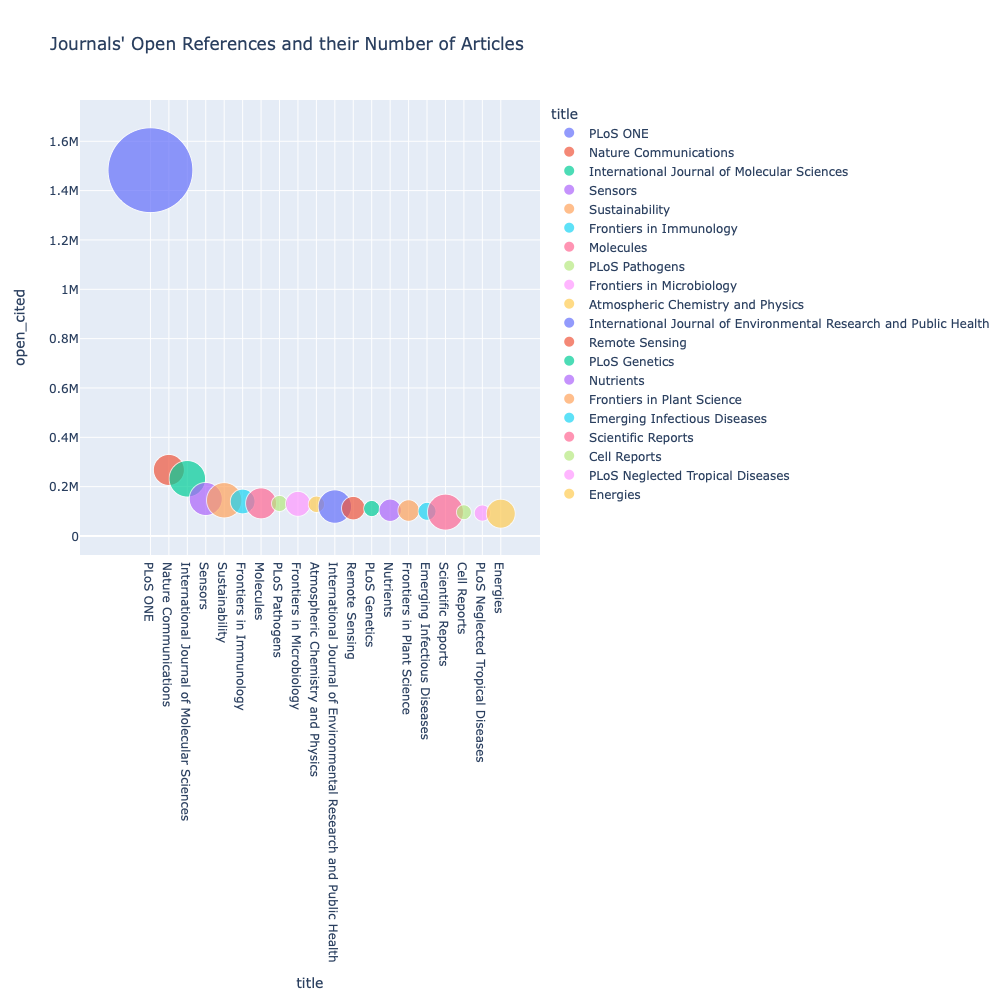

In [32]:
sorted_by_open_cited_with_num_dois = px.scatter(df_sorted_by_open_cited.iloc[:20,:], x="title", y="open_cited",
                                                size="dois", color="title", title="Journals' Open References and their Number of Articles",
                                                hover_name="title", width=1200, height=1000, size_max=60)
sorted_by_open_cited_with_num_dois.show()

Plotting the timeline of citations going and coming to open journals:

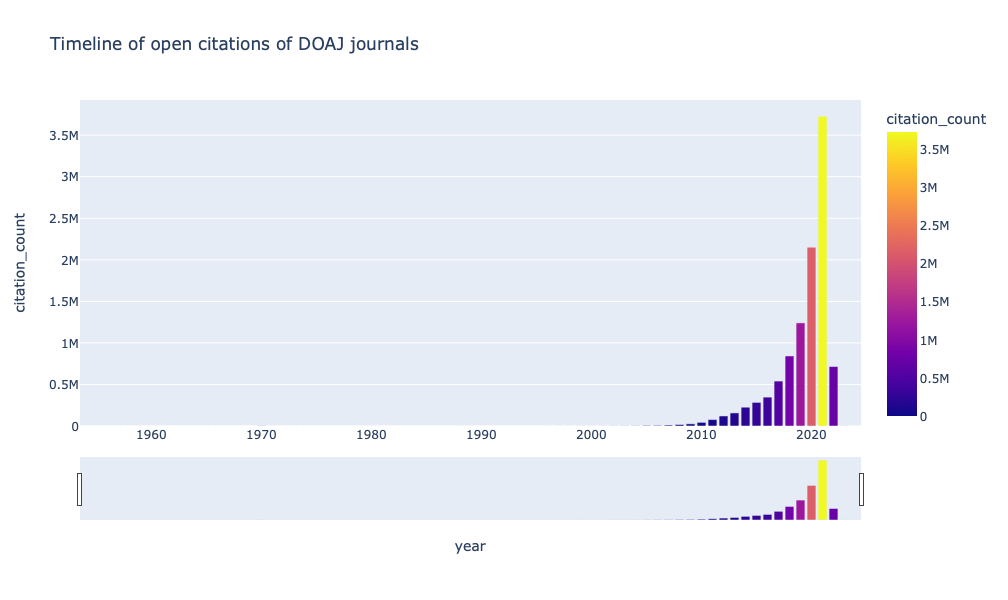

In [38]:
open_cit_fig = px.bar(open_cit_df, x='year', y='citation_count',
                      color='citation_count', 
                      height=600,
                      title='Timeline of open citations of DOAJ journals')
open_cit_fig.update_xaxes(rangeslider_visible=True)
open_cit_fig.show()

Plotting the timeline of citations going and coming to open journals in the last 20 years:

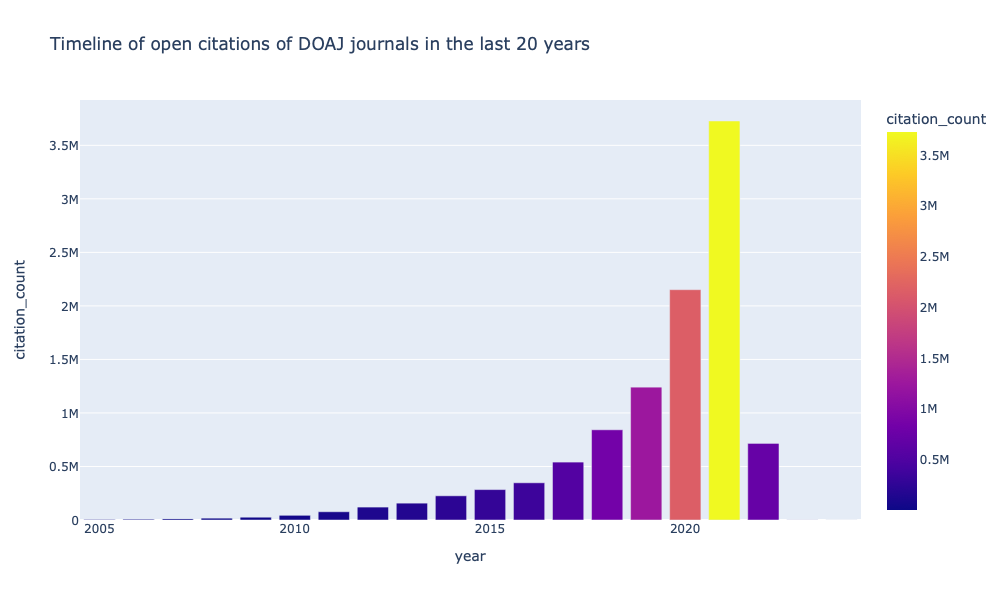

In [40]:
open_cit_20_fig = px.bar(open_cit_df.tail(20), x='year', y='citation_count', 
             hover_data=['citation_count'],
             title='Timeline of open citations of DOAJ journals in the last 20 years', 
             color='citation_count', 
             height=600)
open_cit_20_fig.show()